# Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

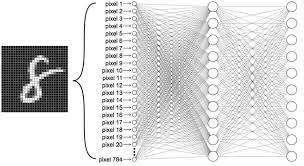

## Create Neural Network
* A Neural network is a computer system modelled on the human brain and nervous system.
* Using TensorFlow, an open-source Python library developed by the Google Brain labs for deep learning research, you will take hand-drawn images of the numbers 0-9 and build and train a neural network to recognize and predict the correct label for the digit displayed.
* Keras is a high-level neural network API focused on user friendliness, fast prototyping, modularity and extensibility.
* gzip is used to open the gz files

In [1]:
# Import keras, numpy and gzip.
# keras uses tendorflow to create the neural network
import keras as kr
import numpy as np
import gzip
# For encoding categorical variables.
import sklearn.preprocessing as pre

C:\Users\sarahc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Opening the files to be read
* each files consists of bytes 
* when you use gzip.open you can read the file 1 byte at a time

In [2]:
# open each of the training .gzip files as done in mnist dataset notebook.
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()
with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()

* Start a neural network, building it by layers.
* There are two main types of models available in Keras: the Sequential model, and the Model class used with the functional API. 
* These models have a number of methods and attributes in common: model.
* layers is a flattened list of the layers comprising the model.
* inputs is the list of input tensors of the model.

In [3]:
model = kr.models.Sequential()

* Add a hidden layer with x neurons and an input layer with 784. The more hidden layers the stronger the neural network.
* each input neuron is connected to each of the x neurons at each layer.
* each activation type performs differently.
* In the final layer of the network ,there only needs to be 10 units one for each character

In [4]:
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=500, activation='sigmoid', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=300, activation='relu', input_dim=784))
model.add(kr.layers.Dense(units=150, activation='tanh', input_dim=784))
# Final layer of network needs 10 units one for each numerical value tested
model.add(kr.layers.Dense(units=10, activation='sigmoid'))

*  Build the graph. The optimizor plays a roll is the outcome of the accuricy
* the loss when changed to binary_crossentropy increases the accuracy for the program greatly

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

* reshape to 28*28 pixal size the training image set to ~ changed backgroud black and white reverse

In [6]:
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)/255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

* create variable called inputs that reshapes the 28*28 to 784.

In [7]:
inputs = train_img.reshape(60000, 784)

In [8]:
encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

* create a model to train your nn.
* This runs a total of 10 times once for each epochs, and batch size of 98 this means there are 127 values going though every iteration

In [9]:
model.fit(inputs, outputs, epochs=15, batch_size=127)

Epoch 1/15
60000/60000 [==============================] - 36s 594us/step - loss: 0.1471 - acc: 0.94831s - lo
Epoch 2/15
60000/60000 [==============================] - 29s 477us/step - loss: 0.0501 - acc: 0.9832
Epoch 3/15
60000/60000 [==============================] - 29s 484us/step - loss: 0.0382 - acc: 0.98710s - loss: 0.0384 
Epoch 4/15
60000/60000 [==============================] - 29s 482us/step - loss: 0.0303 - acc: 0.9898
Epoch 5/15
60000/60000 [==============================] - 29s 482us/step - loss: 0.0267 - acc: 0.9911
Epoch 6/15
60000/60000 [==============================] - 30s 501us/step - loss: 0.0254 - acc: 0.9915
Epoch 7/15
60000/60000 [==============================] - 30s 494us/step - loss: 0.0250 - acc: 0.9915
Epoch 8/15
60000/60000 [==============================] - 28s 475us/step - loss: 0.0219 - acc: 0.99262s - loss: 0.0218 - acc:  - 
Epoch 9/15
60000/60000 [==============================] - 29s 486us/step - loss: 0.0217 - acc: 0.9926
Epoch 10/15
60000/60000 [====

In [10]:
# unzip the test image and lables files
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()

In [11]:
# ensure all images in the test set are size 28*28 pixals and divide the solution to give values between 0-1
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

In [12]:
# conpared prediction with the actual set of test information and gives back a value of the number of test data the network pridicted correctly
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9668

## References
https://keras.io/models/about-keras-models/  
https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d  
http://makeyourownneuralnetwork.blogspot.com/2015/03/the-mnist-dataset-of-handwitten-digits.html  
https://keras.io/getting-started/sequential-model-guide/  
https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-recognize-handwritten-digits-with-tensorflow  
https://nextjournal.com/gkoehler/digit-recognition-with-keras  
https://www.tensorflow.org/api_docs/python/tf/keras/metrics/binary_accuracy  